In [1]:
import jCMIP as jc
Clist = jc.readList(('CMIP6listnew'))

from netCDF4 import Dataset
from netCDF4 import num2date
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import cftime
import gsw
from datetime import date, timedelta
import pandas as pd
from scipy.interpolate import interp1d

#### Check tr and iw boundary (PT = 8)

In [6]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']

for i in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[i] + '_historical_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')
    tp      = ncid.variables['tp'][:,:]
    lev     = ncid.variables['lev'][:]
    T       = ncid.variables['thetao'][:,:,0,:]
    ncid.close()

    #Find boundary tr and iw using PT = 8
    tmean = np.nanmean(T,axis=0)
    PTrow     = np.nanmean(tmean,axis=1)
    PT8idx    = np.nanargmin(np.abs(PTrow-8))
    
    tprow = np.nansum(tp,axis=1)
    mocbt = -1*np.cumsum(tprow[::-1])[::-1]
    
    imax2 = np.where(mocbt == max(mocbt))
    imax1 = imax2[0]
    imax = imax1[0]
    
    if PT8idx > imax:
        print(str(totmod[i]) + ' - True - ' + str(lev[PT8idx]))
    else:
        print(str(totmod[i]) + ' - False - ' + str(lev[PT8idx]))

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


CAMS-CSM1-0 - True - 1570.3570556640625
CAS-ESM2-0 - False - 731.3966064453125
CESM2-WACCM - True - 1244.566875
CIESM - True - 1400.4971923828125


/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


CMCC-CM2-SR5 - True - 1232.717146663553
CMCC-ESM2 - True - 1232.717146663553
CNRM-CM6-1 - True - 856.6789423505214
CNRM-ESM2-1 - True - 947.4478970895176
CanESM5 - True - 1136.9219970703125
EC-Earth3 - True - 1151.9912109375
FIO-ESM-2-0 - False - 1244.0
HadGEM3-GC31-LL - True - 1045.854248046875
HadGEM3-GC31-MM - True - 1045.854248046875
IPSL-CM6A-LR - True - 947.4478759765625
MIROC6 - False - 1350.0
MPI-ESM1-2-HR - True - 1220.0
MPI-ESM1-2-LR - True - 1365.0
MRI-ESM2-0 - True - 1100.0
NESM3 - False - 855.1112060546875
UKESM1-0-LL - True - 1045.854248046875


#### Check tr and iw boundary (SP = 35psu)

In [7]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']

for i in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[i] + '_historical_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')
    tp      = ncid.variables['tp'][:,:]
    lev     = ncid.variables['lev'][:]
    SP      = ncid.variables['so'][:,:,0,:]
    ncid.close()

    #Find boundary tr and iw using SP = 35psu
    spmean   = np.nanmean(SP,axis=0)
    SProw    = np.nanmean(spmean,axis=1)
    SPidx    = np.nanargmin(np.abs(SProw-35))
    
    tprow = np.nansum(tp,axis=1)
    mocbt = -1*np.cumsum(tprow[::-1])[::-1]
    
    imax2 = np.where(mocbt == max(mocbt))
    imax1 = imax2[0]
    imax = imax1[0]
    
    if SPidx > imax:
        print(str(totmod[i]) + ' - True - ' + str(lev[SPidx]))
    else:
        print(str(totmod[i]) + ' - False - ' + str(lev[SPidx]))

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


CAMS-CSM1-0 - True - 2596.269287109375
CAS-ESM2-0 - True - 4189.66162109375
CESM2-WACCM - True - 4875.0834375
CIESM - True - 2889.384521484375


/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


CMCC-CM2-SR5 - True - 2953.915321323046
CMCC-ESM2 - True - 2953.915321323046
CNRM-CM6-1 - True - 1265.861416986486
CNRM-ESM2-1 - True - 1516.3636295390095
CanESM5 - True - 1655.4716796875
EC-Earth3 - True - 2600.38037109375
FIO-ESM-2-0 - True - 5375.0
HadGEM3-GC31-LL - True - 3138.56494140625
HadGEM3-GC31-MM - True - 3138.56494140625
IPSL-CM6A-LR - True - 1652.5684814453125
MIROC6 - True - 4740.0
MPI-ESM1-2-HR - True - 2525.0
MPI-ESM1-2-LR - True - 2785.0
MRI-ESM2-0 - True - 1812.5
NESM3 - True - 1470.8929443359375
UKESM1-0-LL - True - 2776.039306640625


#### Check upper and lower NADW boundary (PT = 3)

In [137]:
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']

for i in range (len(totmod)):
    outfile = ('/home/users/jordi/section26data/' + totmod[i] + '_historical_' + ENS[i] + '.nc')
    ncid    = Dataset(outfile,'r')
    tp      = ncid.variables['tp'][:,:]
    lev     = ncid.variables['lev'][:]
    lat     = np.squeeze(ncid.variables['lat'][:,:])
    lon     = np.squeeze(ncid.variables['lon'][:,:])
    T       = ncid.variables['thetao'][:,:,0,:]
    SP      = ncid.variables['so'][:,:,0,:]
    ncid.close()

    #Find boundary lNADW and uNADW using PT = 3
    tmean = np.nanmean(T,axis=0)
    PTrow = np.nanmean(tmean,axis=1)
    PTidx = np.nanargmin(np.abs(PTrow-3))
    
    #Find boundary AABW and lNADW using shift from - to + tp
    tpcol = np.nansum(tp,axis=0)
    
    idx2 = np.where(tpcol<0)
    idx1 = idx2[0]
    idx = idx1[0]
    tprow_mo = np.nansum(tp[:,idx::],axis=1)

    for l in range (len(tprow_mo)):
        if tprow_mo[l]>0 and tprow_mo[l-1]<0:
            Aidx3 = tprow_mo[l]
        
    Aidx2 = np.where(tprow_mo == Aidx3)
    Aidx1 = Aidx2[0]
    Aidx = Aidx1[0]
    
    if PTidx > Aidx:
        print(str(totmod[i]) + ' - True')
    else:
        print(str(totmod[i]) + ' - ' + str(lev[PTidx]))

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


CAMS-CSM1-0 - True
CAS-ESM2-0 - 2897.5361328125
CESM2-WACCM - 3627.6703125
CIESM - 3133.404541015625


/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


CMCC-CM2-SR5 - True
CMCC-ESM2 - True
CNRM-CM6-1 - True
CNRM-ESM2-1 - True
CanESM5 - 2485.370849609375
EC-Earth3 - True
FIO-ESM-2-0 - 3379.0
HadGEM3-GC31-LL - True
HadGEM3-GC31-MM - True
IPSL-CM6A-LR - True
MIROC6 - True
MPI-ESM1-2-HR - 3395.0
MPI-ESM1-2-LR - 3770.0
MRI-ESM2-0 - True
NESM3 - True
UKESM1-0-LL - True


#### Density calculations and plots

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


[1025.76663718 1030.85209617 1032.36371407 1041.44808751 1050.4241443 ]
[25.55215772 27.29426263 27.43689014 27.77490315 27.81836267]


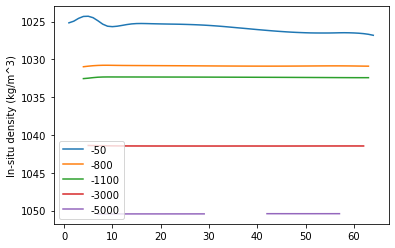

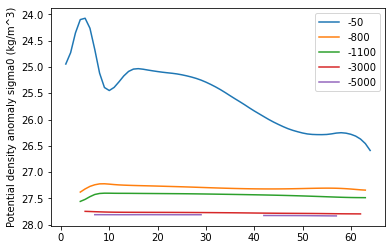

In [87]:
#Compute in-situ and potential density anomaly for depth boundaries
totmod =  ['CAMS-CSM1-0','CAS-ESM2-0','CESM2-WACCM','CIESM','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5','EC-Earth3','FIO-ESM-2-0',
            'HadGEM3-GC31-LL','HadGEM3-GC31-MM','IPSL-CM6A-LR','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR','MRI-ESM2-0','NESM3','UKESM1-0-LL']
ENS    =  ['r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2','r2i1p1f2','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f3',
           'r1i1p1f3','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f1','r1i1p1f2']

outfile = ('/home/users/jordi/section26data/' + totmod[0] + '_historical_' + ENS[0] + '.nc')
ncid = Dataset(outfile,'r')
lev = ncid.variables['lev'][:]
lat = np.squeeze(ncid.variables['lat'][:,:])
lon = np.squeeze(ncid.variables['lon'][:,:])
SP = ncid.variables['so'][:,:,:,:]
T = ncid.variables['thetao'][:,:,:,:]
ncid.close()

spmean = np.squeeze(np.nanmean(SP,axis=0))
tmean = np.squeeze(np.nanmean(T,axis=0))
z   = [-50,-800,-1100,-3000,-5000]
p   = np.zeros(len(z))
SA  = np.zeros((len(z),len(lon)))
CT  = np.zeros((len(z),len(lon)))
rho = np.zeros((len(z),len(lon)))
rhopt = np.zeros((len(z),len(lon)))

#Calculate in-situ density at boundaries (SP = practical salinity, SA = absolute salinity, CT = conservative T, PT = potential T, p = sea pressure)
for i in range (len(z)):
    p[i]   = gsw.p_from_z(z[i], lat[0])
    for j in range (len(lon)):
        SA[i,j]  = gsw.SA_from_SP(spmean[int(iz[i]),j],p[i],lon[j],lat[0])
        PT[i,j]  = gsw.pt0_from_t(SA[i,j],tmean[i,j],p[i])
        CT[i,j]  = gsw.CT_from_t(SA[i,j],tmean[int(iz[i]),j],p[i])
        rho[i,j] = gsw.density.rho(SA[i,j],CT[i,j],p[i])
        rhopt[i,j] = gsw.density.sigma0(SA[i,j],CT[i,j])
        
        
    plt.figure(1)    
    plt.plot(rho[i,:],label=z[i])
    plt.gca().invert_yaxis()
    plt.ylabel('In-situ density (kg/m^3)')
    plt.legend()
    plt.figure(2)    
    plt.plot(rhopt[i,:],label=z[i])
    plt.gca().invert_yaxis()
    plt.ylabel('Potential density anomaly sigma0 (kg/m^3)')
    plt.legend()
    
rhomean = np.nanmean(rho,axis=1)
rhoptmean = np.nanmean(rhopt,axis=1)
print(rhomean)
print(rhoptmean)

/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/users/jmecking001/miniconda3/envs/jordi_2021/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


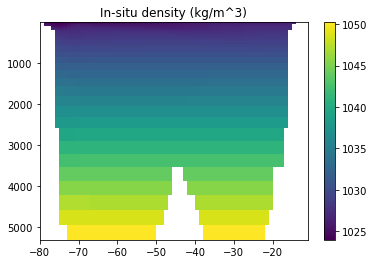

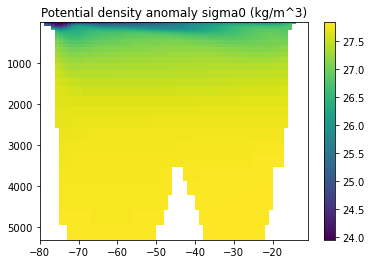

In [130]:
#Compute in-situ density and potential density anomaly for cross section
p   = np.zeros(len(lev))
SA  = np.zeros((len(lev),len(lon)))
CT  = np.zeros((len(lev),len(lon)))
rho = np.zeros((len(lev),len(lon)))
rhopt = np.zeros((len(lev),len(lon)))

#Calculate in-situ density at boundaries (SP = practical salinity, SA = absolute salinity, CT = conservative temperature, p = sea pressure)
for i in range (len(lev)):
    p[i] = gsw.p_from_z(-1*lev[i], lat[0])
    for j in range (len(lon)):
        SA[i,j]  = gsw.SA_from_SP(spmean[i,j],p[i],lon[j],lat[0])
        CT[i,j]  = gsw.CT_from_t(SA[i,j],tmean[i,j],p[i])
        rho[i,j] = gsw.density.rho(SA[i,j],CT[i,j],p[i])
        rhopt[i,j] = gsw.density.sigma0(SA[i,j],CT[i,j])
        
plt.figure(1) 
plt.title('In-situ density (kg/m^3)')
plt.pcolormesh(lon,lev,rho)
plt.gca().invert_yaxis()
plt.colorbar()
plt.figure(2)   
plt.title('Potential density anomaly sigma0 (kg/m^3)')
plt.pcolormesh(lon,lev,rhopt)
plt.gca().invert_yaxis()
plt.colorbar()